In [1]:
# pip install shap

In [2]:
# pip install utils

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelEncoder
import joblib
import shap
import argparse
# from utils import load_data,build_preprocessor,save_artifact


c:\Users\venka\anaconda3\envs\data_science_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from json import load


# def main(data_path,out_dir):
#     df=load_data(data_path)

In [5]:
df=pd.read_csv('differentiated_thyroid_cancer_recurrence.csv')
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,'Single nodular goiter-left',No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,'Multinodular goiter',No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,'Single nodular goiter-right',No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,'Single nodular goiter-right',No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,'Multinodular goiter',No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [6]:
print("the columns are\n:",df.columns.tolist())
print("====="*20)
print("the shape is\n:",df.shape)
print("====="*20)
print("the dtypes are\n:")
print(pd.DataFrame({'Column':df.columns,'Dtype':df.dtypes.values}))
print("====="*20)
print("the Numeric Summary is\n:",df.describe())
print("\n===== Categoical Summary ======")
print(df.describe(include='object'))
print("====="*20)
print("The Missing Values are\n:",df.isnull().sum())

the columns are
: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
the shape is
: (383, 17)
the dtypes are
:
                  Column   Dtype
0                    Age   int64
1                 Gender  object
2                Smoking  object
3             Hx Smoking  object
4        Hx Radiothreapy  object
5       Thyroid Function  object
6   Physical Examination  object
7             Adenopathy  object
8              Pathology  object
9               Focality  object
10                  Risk  object
11                     T  object
12                     N  object
13                     M  object
14                 Stage  object
15              Response  object
16              Recurred  object
the Numeric Summary is
:               Age
count  383.000000
mean    40.866841
std     15.134494
min     15.000000
25%     29.000000
50%     37.0

In [7]:
Stats=df.describe(include='all')
pd.set_option('display.max_columns',None)
Stats

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,NaN,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,NaN,F,No,No,No,Euthyroid,'Multinodular goiter',No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,NaN,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275
mean,40.866841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,15.134494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,'Single nodular goiter-left',No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,'Multinodular goiter',No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [9]:
df['Age']=df['Age'].astype(int)

In [10]:
def check_uniauq_values(df):
    for col in df.select_dtypes(include='object').columns:
        unique_vals=df[col].value_counts()
        print(f"columns {col} has \n{unique_vals} unique values")
        print('===='*20)
        print("===="*20)
        unique_vals=df[col].nunique()
        print(f"columns {col} has \n {unique_vals} unique columns")
        print('===='*20)
        print("===="*20)
check_uniauq_values(df)

columns Gender has 
Gender
F    312
M     71
Name: count, dtype: int64 unique values
columns Gender has 
 2 unique columns
columns Smoking has 
Smoking
No     334
Yes     49
Name: count, dtype: int64 unique values
columns Smoking has 
 2 unique columns
columns Hx Smoking has 
Hx Smoking
No     355
Yes     28
Name: count, dtype: int64 unique values
columns Hx Smoking has 
 2 unique columns
columns Hx Radiothreapy has 
Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64 unique values
columns Hx Radiothreapy has 
 2 unique columns
columns Thyroid Function has 
Thyroid Function
Euthyroid                        332
'Clinical Hyperthyroidism'        20
'Subclinical Hypothyroidism'      14
'Clinical Hypothyroidism'         12
'Subclinical Hyperthyroidism'      5
Name: count, dtype: int64 unique values
columns Thyroid Function has 
 5 unique columns
columns Physical Examination has 
Physical Examination
'Multinodular goiter'            140
'Single nodular goiter-right'    140
'Sing

In [11]:
enoding_maps={
    "Gender":{'F':0,'M':1},
    "Smoking":{'No':0,"Yes":1},
    "Hx Smoking":{'No':0,'Yes':1},
    "Hx Radiothreapy":{'No':0,'Yes':1},
    "Focality":{'Uni-Focal':0,'Multi-Focal':1},
    "M":{'M0':0,"M1":1},
    "Recurred":{'No':0,'Yes':1},
    
    "Risk":{'Low':0,'Intermediate':1,'High':2},
    'Stage':{'I':1,'II':2,'III':3,"IVA":4,'IVB':5},
    
    "T":{'T1a':1,'T1b':2,'T2':3,'T3a':4,'T3b':5,'T4a':6,'T4b':7},
    "N":{'N0':0,"N1a":1,'N1b':2},
    
    "Response":{
        'Excellent': 0,
        'Indeterminate': 1,
        "'Biochemical Incomplete'": 2,
        "'Structural Incomplete'": 3
    },
    
        "Thyroid Function": {
        'Euthyroid': 0,
        "'Clinical Hyperthyroidism'": 1,
        "'Subclinical Hyperthyroidism'": 2,
        "'Clinical Hypothyroidism'": 3,
        "'Subclinical Hypothyroidism'": 4
    },
    
        "Physical Examination": {
        "'Multinodular goiter'": 0,
        "'Single nodular goiter-right'": 1,
        "'Single nodular goiter-left'": 2,
        "'Diffuse goiter'": 3,
        'Normal': 4
    },
        "Adenopathy": {
        'No': 0,
        'Right': 1,
        'Left': 2,
        'Bilateral': 3,
        'Extensive': 4,
        'Posterior': 5
    },
    "Pathology": {
        'Papillary': 0,
        'Micropapillary': 1,
        'Follicular': 2,
        "'Hurthel cell'": 3
    }
    
    
    
}


for col,mapping in enoding_maps.items():
    if col in df.columns:
        df[col]=df[col].map(mapping)

In [12]:
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,0,2,0,1,0,0,1,0,0,1,1,0
1,34,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
2,30,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
3,62,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4,62,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0


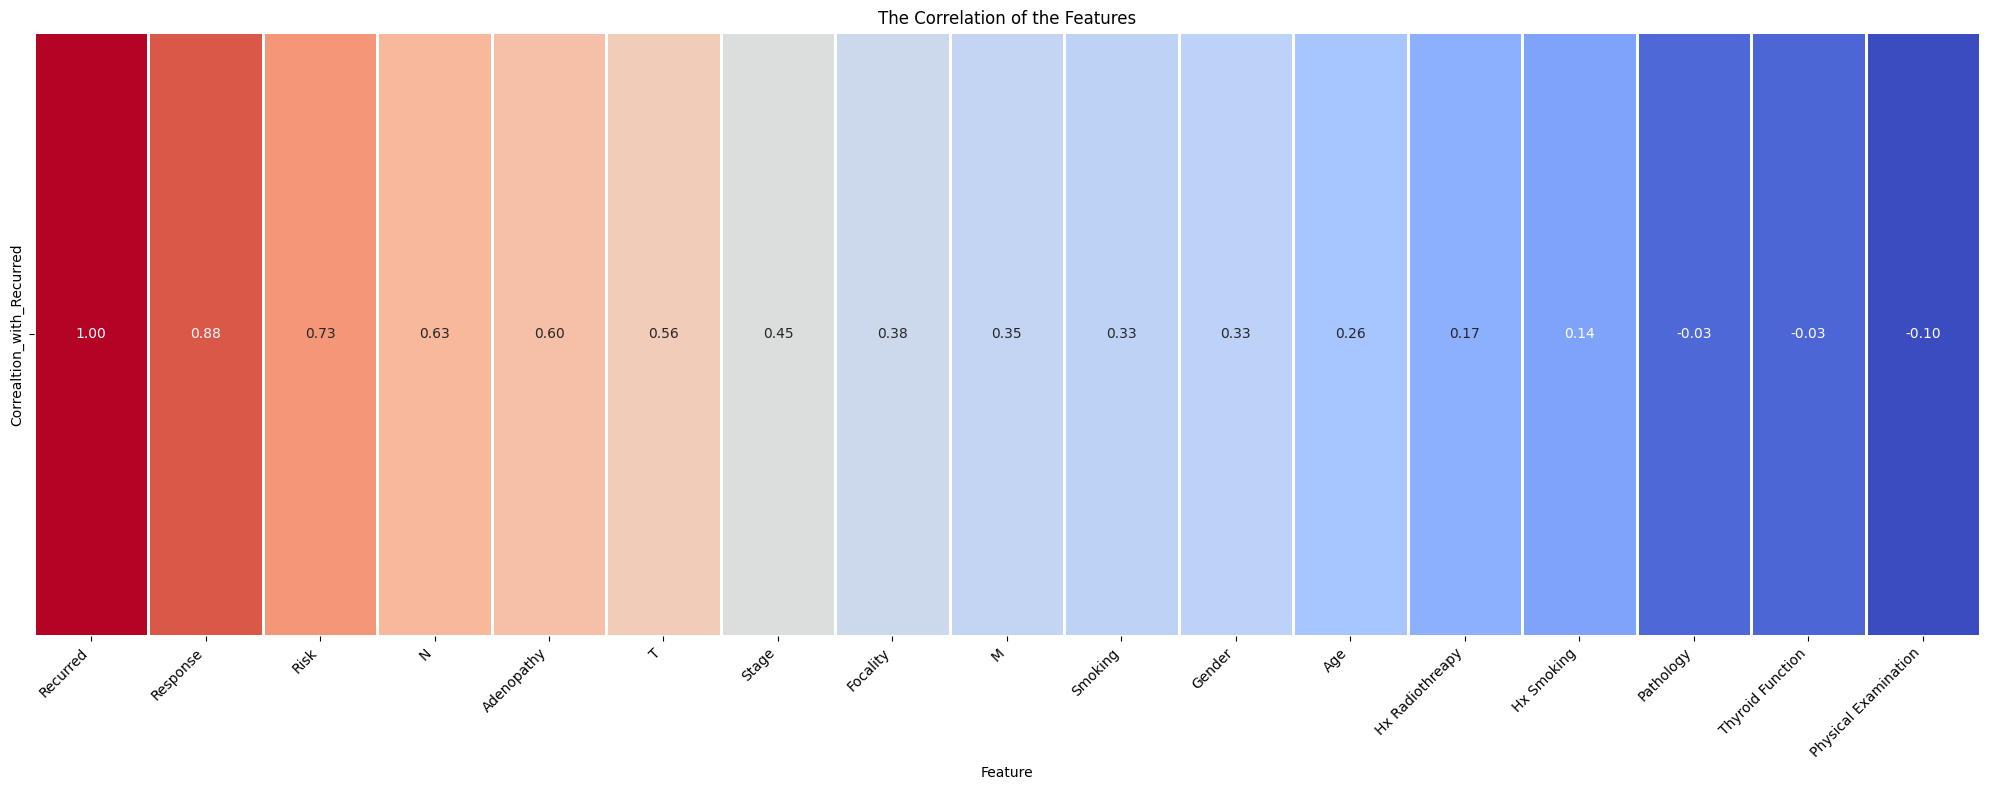

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

target='Recurred'

corr_with_target=df.corr()[target].sort_values(ascending=False)
corr_df=pd.DataFrame(corr_with_target).reset_index()
corr_df.columns=['Feature',f'Correaltion_with_{target}']


plt.figure(figsize=(20,8))
sns.heatmap(corr_df.set_index('Feature').T,annot=True,cmap='coolwarm',fmt='.2f',linewidths=1,cbar=False)
plt.title("The Correlation of the Features")
# plt.yticks(rotations=0)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()



the useage of the ##chisqaure-test## is imp beacuse (if use the .corr and Pearson when we convert the cetagorical values to numerical values it don't represent true linear relationship and it may give the misleading results ) so we use the chi-suqare test for the encoded categotical values 


Case	                           Use This Test

Categorical vs Categorical	✅ Chi-Square Test

Numeric vs Binary Categorical	✅ t-test or 1-way ANOVA

Numeric vs Multi-class	✅ 1-way ANOVA

In [14]:
import pandas as pd 
from scipy.stats import chi2_contingency, f_oneway

# Chi-square test for categorical features
categorical_features = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
                        'Thyroid Function', 'Physical Examination', 'Adenopathy',
                        'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

for col in categorical_features:
    contingency = pd.crosstab(df[col], df['Recurred'])
    chi2, p, dof, ex = chi2_contingency(contingency)
    print(f"{col} → p-value: {p:.4f}")

# ANOVA (for numeric feature vs binary target)
group1 = df[df['Recurred']==0]['Age']
group2 = df[df['Recurred']==1]['Age']
stat, p = f_oneway(group1, group2)
print(f"\nAge → ANOVA p-value: {p:.4f}")


Gender → p-value: 0.0000
Smoking → p-value: 0.0000
Hx Smoking → p-value: 0.0145
Hx Radiothreapy → p-value: 0.0028
Thyroid Function → p-value: 0.2724
Physical Examination → p-value: 0.0114
Adenopathy → p-value: 0.0000
Pathology → p-value: 0.0000
Focality → p-value: 0.0000
Risk → p-value: 0.0000
T → p-value: 0.0000
N → p-value: 0.0000
M → p-value: 0.0000
Stage → p-value: 0.0000
Response → p-value: 0.0000

Age → ANOVA p-value: 0.0000


if the p-value is < 0.05 then its related to the target value[have relationship]

if the p-value is >= 0.05 then its not related to the target value[no relationship]   

in here the (Thyroid Function → p-value: 0.2724) this is not having any realtion towards the target value

In [15]:
df.drop('Thyroid Function',axis=1,inplace=True)

In [16]:
df.columns.to_list()

['Age',
 'Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response',
 'Recurred']

In [17]:
df.dtypes

Age                     int32
Gender                  int64
Smoking                 int64
Hx Smoking              int64
Hx Radiothreapy         int64
Physical Examination    int64
Adenopathy              int64
Pathology               int64
Focality                int64
Risk                    int64
T                       int64
N                       int64
M                       int64
Stage                   int64
Response                int64
Recurred                int64
dtype: object

Skewness of Data
T                       0.444013
Focality                0.608011
Response                0.754044
Physical Examination    0.805840
Recurred                0.972847
N                       1.029085
Risk                    1.199475
Gender                  1.625611
Pathology               1.930492
Adenopathy              1.942998
Smoking                 2.236555
Hx Smoking              3.292764
Stage                   3.853706
M                       4.297866
Hx Radiothreapy         7.220870
dtype: float64


C:\Users\venka\AppData\Local\Temp\ipykernel_19092\475912184.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_values.index,y=skew_values.values,palette='coolwarm')


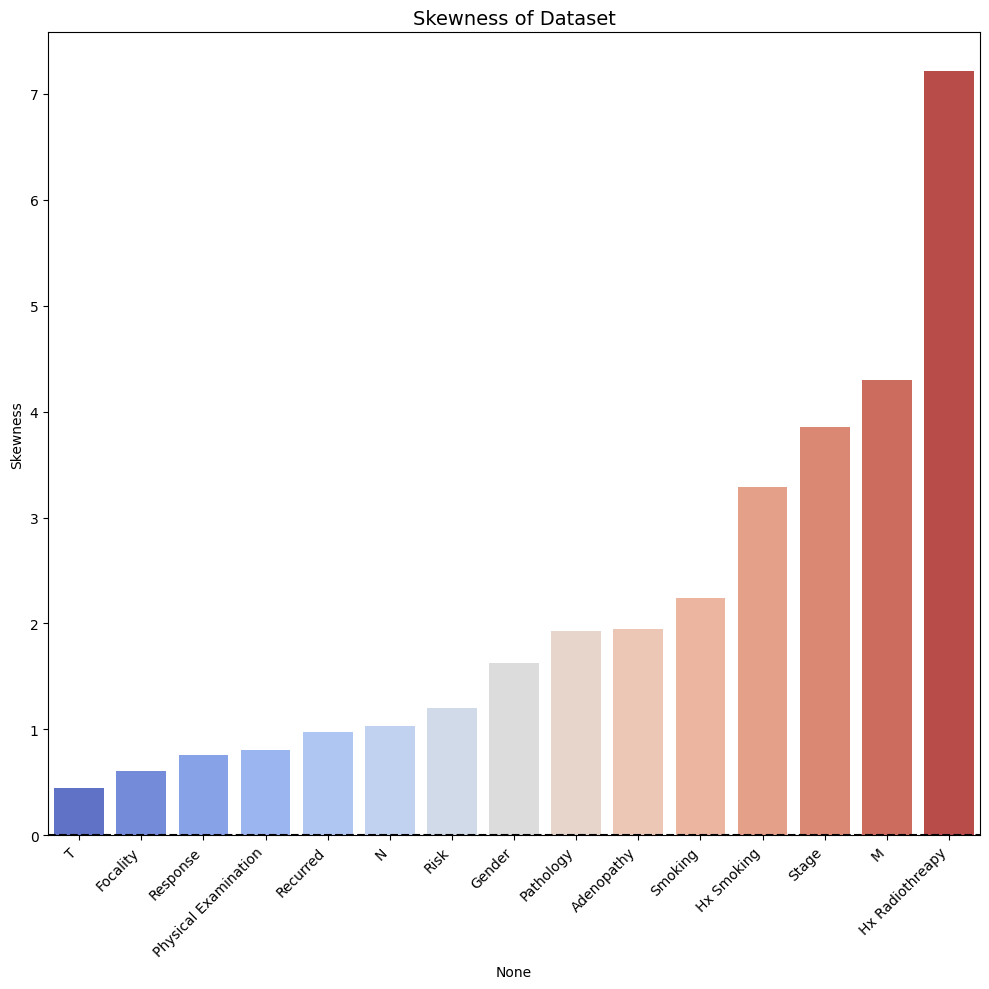

In [18]:
numer_cols=df.select_dtypes(include='int64').columns
skew_values=df[numer_cols].skew().sort_values(ascending=True)

print("Skewness of Data")
print(skew_values)

plt.figure(figsize=(10,10))
sns.barplot(x=skew_values.index,y=skew_values.values,palette='coolwarm')
plt.title("Skewness of Dataset",fontsize=14)
plt.xticks(rotation=45,ha='right')
plt.axhline(0,color='black',linestyle='--')
plt.ylabel('Skewness')
plt.tight_layout()


border(if the skewness is ==0 then it's symmetrical or normal ["Data is balanced"]                                                                

if the skewness is >0 then it is Right-skewed(postive) [low values]     

if the skewness is <0 then it is Left-skewes(negative) [high values],color=blue)



In [19]:
#this code for the better expalin of the skewness
from IPython.display import display, HTML

def show_skewness(skew):
    if skew == 0:
        msg = "Data is balanced (Symmetrical / Normal Distribution)"
    elif skew > 0:
        msg = "Right-skewed (Positive Skew) — More low values"
    else:
        msg = "Left-skewed (Negative Skew) — More high values"

    # Blue border with light background
    html = f"""
    <div style="
        border: 2px solid blue;
        border-radius: 10px;
        padding: 10px;
        background-color: #f0f8ff;
        color: #000000;
        font-size: 15px;
        font-family: Arial, sans-serif;
        width: fit-content;

        ">
        {msg}
    </div>
    """
    display(HTML(html))

# Example Usage
skew_value = -0.42
show_skewness(skew_value)


Skewness of Data
T                       0.444013

Focality                0.608011

Response                0.754044

Physical Examination    0.805840

Recurred                0.972847

N                       1.029085

Risk                    1.199475

Gender                  1.625611

Pathology               1.930492

Adenopathy              1.942998

Smoking                 2.236555

Hx Smoking              3.292764

Stage                   3.853706

M                       4.297866

Hx Radiothreapy         7.220870


This data tells about the skewness 
The data contains the value of the >0 or greater than zero so this all values or right-skewed 

and there are no left skewed values 

In [20]:
from scipy.stats import boxcox
skewd_values=["Hx Smoking","Stage","M","Hx Radiothreapy"]
for col in skewd_values:
    df[col]=np.log1p(df[col])
    

Instead of using log or Box-Cox transformations, we used Frequency Encoding and Target Encoding for categorical features.

Usually, we convert categorical data using One-Hot or Label Encoding, but these methods can make the data lose its real meaning. For example, label encoding assigns random numbers to categories, and one-hot encoding splits them into separate columns — so the model doesn’t really know how often or how important each category is.

Because of this, using log transformations later doesn’t make much sense — those transformations are meant for real numeric values, not artificial ones.

So, we use:

Frequency Encoding: replaces each category with how many times it appears in the dataset.

Target Encoding: replaces each category with the average (or percentage) of the target value for that category.

This helps keep the original meaning and relationship of each feature while still converting them into a numeric form the model can understand.

In [21]:
x=df.drop(['Recurred'],axis=1)
y=df['Recurred']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)


In [22]:
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)


In [23]:
le=LogisticRegression(max_iter=1000)
le.fit(x_train,y_train)
le_pred=le.predict(x_test)
print("the accuracy of Logistic Regression is:",accuracy_score(y_test,le_pred))
print("the Classficaation Report is LE_REGGRESSOR:")
print(classification_report(y_test,le_pred))
print("the confusion matrix is:")
print(confusion_matrix(y_test,le_pred))


the accuracy of Logistic Regression is: 0.961038961038961
the Classficaation Report is LE_REGGRESSOR:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.95      0.91      0.93        22

    accuracy                           0.96        77
   macro avg       0.96      0.95      0.95        77
weighted avg       0.96      0.96      0.96        77

the confusion matrix is:
[[54  1]
 [ 2 20]]


In [24]:
xgb=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
print("the accuracy of the XGB_classifier is:",accuracy_score(y_test,xgb_pred))
print("the Classficaation Report for XGB :")
print(classification_report(y_test,xgb_pred))
print("the confusion matrix is:")
print(confusion_matrix(y_test,xgb_pred))

the accuracy of the XGB_classifier is: 0.987012987012987
the Classficaation Report for XGB :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.95      0.98        22

    accuracy                           0.99        77
   macro avg       0.99      0.98      0.98        77
weighted avg       0.99      0.99      0.99        77

the confusion matrix is:
[[55  0]
 [ 1 21]]


c:\Users\venka\anaconda3\envs\data_science_project\lib\site-packages\xgboost\training.py:183: UserWarning: [16:14:30] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [25]:
import joblib
joblib.dump(xgb,"XGB_model.joblib")

['XGB_model.joblib']

In [26]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("the accuracy of the RF_classifier is:",accuracy_score(y_test,rf_pred))
print("the Classficaation Report for RF :")
print(classification_report(y_test,rf_pred))
print("the confusion matrix is:")
print(confusion_matrix(y_test,rf_pred))


the accuracy of the RF_classifier is: 0.961038961038961
the Classficaation Report for RF :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.86      0.93        22

    accuracy                           0.96        77
   macro avg       0.97      0.93      0.95        77
weighted avg       0.96      0.96      0.96        77

the confusion matrix is:
[[55  0]
 [ 3 19]]


In [27]:
rf

RandomForestClassifier(random_state=42)

The below code is for                                                        to handle string or numeric labels automatically and the it avoid the 2D shapes errors ((n,2)--> (n,))                                                                    normalizes decision_funtion()                                           

In [28]:
y_test_numeric = np.where(y_test == 'Yes', 1, 0) if y_test.dtype == 'O' else y_test

# ✅ Check and safely extract probability
def safe_predict_proba(model, X):
    """Return probability for positive class, or fallback to predictions."""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        probs = model.decision_function(X)
        # Normalize to [0,1]
        return (probs - probs.min()) / (probs.max() - probs.min())
    else:
        return model.predict(X)

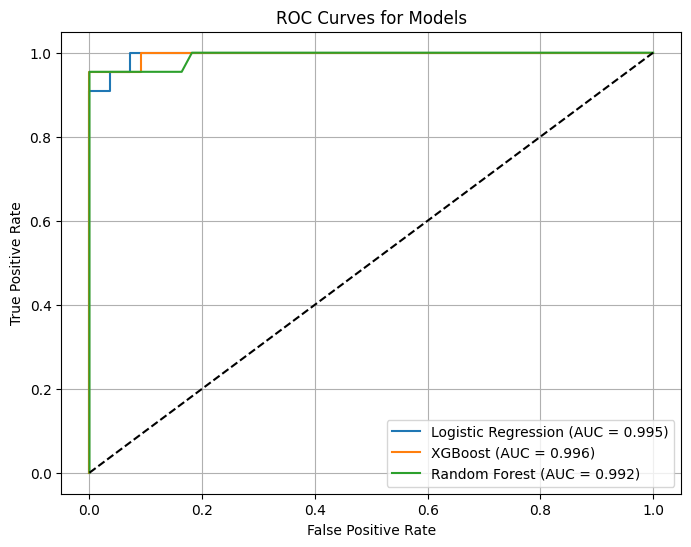

In [29]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, precision_recall_fscore_support,
    roc_curve, precision_recall_curve,auc
)
le_proba = le.predict_proba(x_test)[:, 1]
xgb_proba = xgb.predict_proba(x_test)[:, 1]
rf_proba = rf.predict_proba(x_test)[:, 1]
plt.figure(figsize=(8,6))
for model_name, probs in {
    'Logistic Regression': le_proba,
    'XGBoost': xgb_proba,
    'Random Forest': rf_proba
}.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

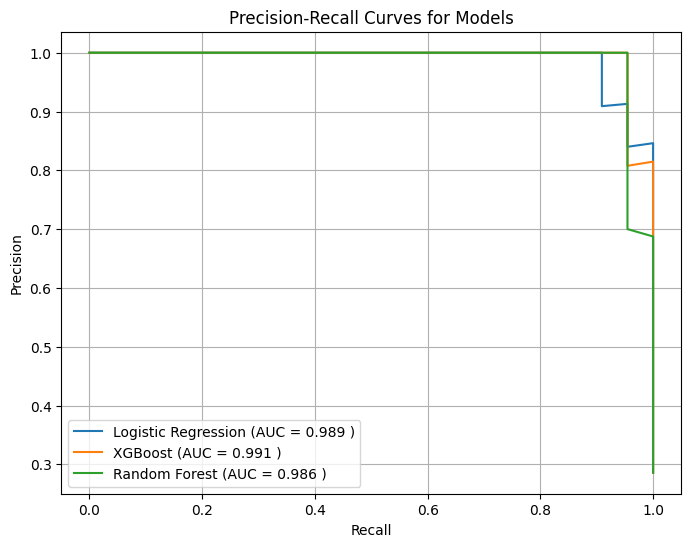

In [30]:
plt.figure(figsize=(8,6))
for model_name, probs in {
    'Logistic Regression': le_proba,
    'XGBoost': xgb_proba,
    'Random Forest': rf_proba
}.items():
    precision, recall, _ = precision_recall_curve(y_test, probs)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.3f} )')

plt.title("Precision-Recall Curves for Models")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Check correlation between encoded features and target in the test set
corrs = x_test.assign(Recurred=y_test).corr()['Recurred'].sort_values(ascending=False)
print("\n🔍 Correlation of features with target in TEST set:")
print(corrs.head(10))



🔍 Correlation of features with target in TEST set:
Recurred      1.000000
Response      0.895782
Risk          0.775910
N             0.716891
Adenopathy    0.619330
T             0.605159
Stage         0.504288
Focality      0.466598
M             0.459639
Age           0.362931
Name: Recurred, dtype: float64


In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(x_train)

X_train_enc = encoder.transform(x_train)
X_test_enc = encoder.transform(x_test)

Test the AUC to  check there is no leakage or overfitting

In [33]:
from sklearn.metrics import roc_auc_score

# Example for Logistic Regression
train_proba = le.predict_proba(x_train)[:,1]
test_proba = le.predict_proba(x_test)[:,1]

print("Train AUC:", roc_auc_score(y_train, train_proba))
print("Test AUC:", roc_auc_score(y_test, test_proba))


Train AUC: 0.9917547568710359
Test AUC: 0.9950413223140495


If the train AUC == test AUC == 1.0 then the leakage is happend                       
If Train AUc is >> is high than the Test AUC then it's overfitting

In [34]:
corr = df.corr()['Recurred'].abs().sort_values(ascending=False)
print(corr.head(10))


Recurred      1.000000
Response      0.879182
Risk          0.733376
N             0.632323
Adenopathy    0.603966
T             0.556201
Stage         0.479112
Focality      0.383776
M             0.354360
Smoking       0.333243
Name: Recurred, dtype: float64


If the correaltion of the features or more than 95+ that of with the target ,then there is data leakage 

C:\Users\venka\AppData\Local\Temp\ipykernel_19092\2193978912.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_imp, palette='mako')


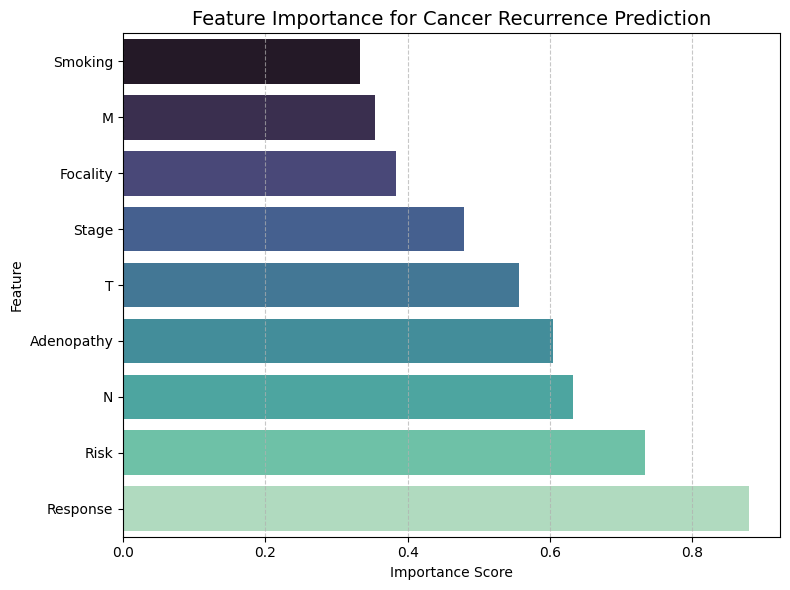

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your feature importance data
feature_importance = {
    'Feature': ['Response', 'Risk', 'N', 'Adenopathy', 'T', 'Stage', 'Focality', 'M', 'Smoking'],
    'Importance': [0.879182, 0.733376, 0.632323, 0.603966, 0.556201, 0.479112, 0.383776, 0.354360, 0.333243]
}

df_imp = pd.DataFrame(feature_importance)
df_imp = df_imp.sort_values('Importance', ascending=True)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=df_imp, palette='mako')
plt.title('Feature Importance for Cancer Recurrence Prediction', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [36]:
print("the feature name in rf are ")
print(rf.feature_names_in_)


the feature name in rf are 
['Age' 'Gender' 'Smoking' 'Hx Smoking' 'Hx Radiothreapy'
 'Physical Examination' 'Adenopathy' 'Pathology' 'Focality' 'Risk' 'T' 'N'
 'M' 'Stage' 'Response']


In [37]:
print(x_test.columns)

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
       'T', 'N', 'M', 'Stage', 'Response'],
      dtype='object')


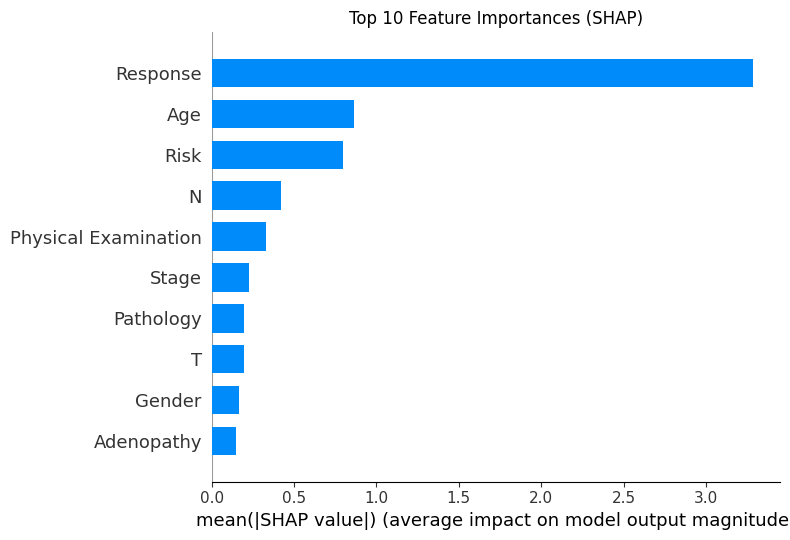

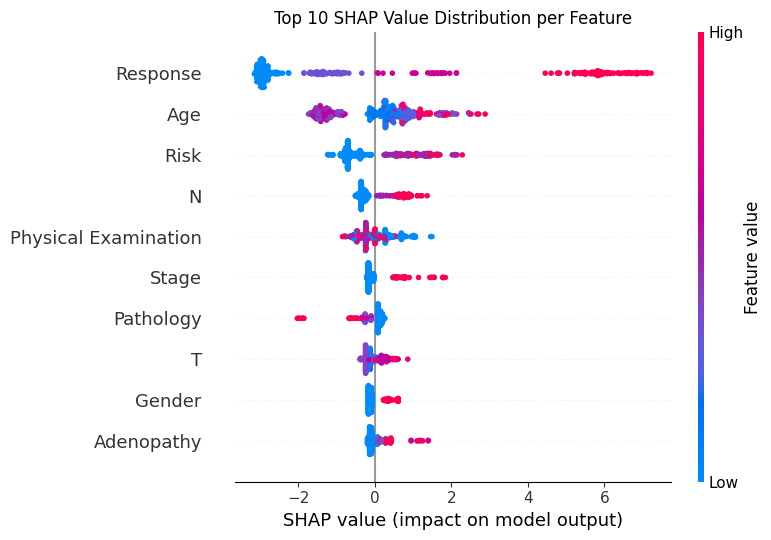

In [38]:
import shap
import matplotlib.pyplot as plt

# Drop the target column if present
X = df.drop(columns=['Recurred'])
y = df['Recurred']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SHAP explainer (works for tree-based models like RF, XGBoost)
explainer = shap.Explainer(xgb, X)
shap_values = explainer(X)

# 1️⃣ Top 10 Feature Importance (mean absolute SHAP)
plt.title("Top 10 Feature Importances (SHAP)")
shap.summary_plot(shap_values, X, plot_type="bar", max_display=10, show=False)
plt.tight_layout()
plt.show()

# 2️⃣ Detailed SHAP Beeswarm Plot (top 10)
plt.title("Top 10 SHAP Value Distribution per Feature")
shap.summary_plot(shap_values, X, max_display=10, show=False)
plt.tight_layout()
plt.show()


In [39]:
import numpy as np
shap_importance = np.abs(shap_values.values).mean(axis=0)
shap_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean_SHAP_Value': shap_importance
}).sort_values(by='Mean_SHAP_Value', ascending=False)

print(shap_importance_df.head(10))


                 Feature  Mean_SHAP_Value
14              Response         3.283900
0                    Age         0.864950
9                   Risk         0.798442
11                     N         0.423959
5   Physical Examination         0.328108
13                 Stage         0.224727
7              Pathology         0.198148
10                     T         0.196019
1                 Gender         0.167690
6             Adenopathy         0.145617


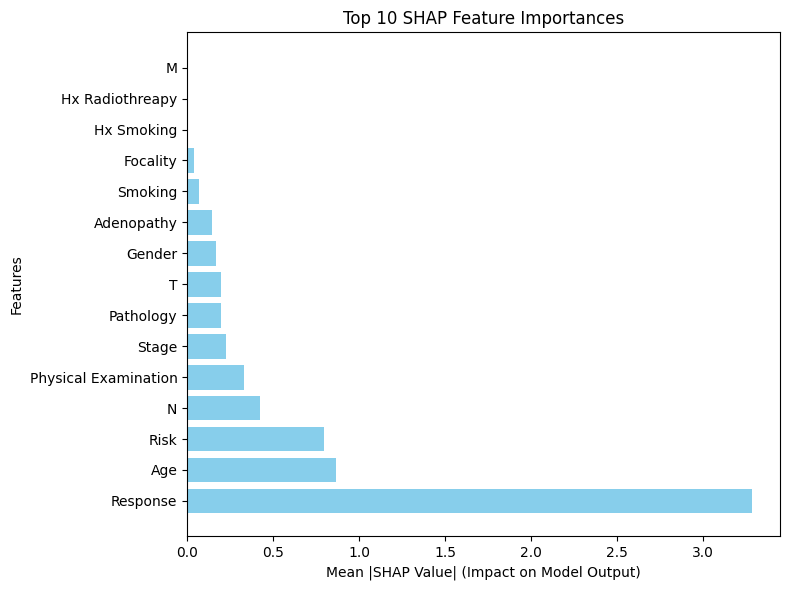

In [40]:
import matplotlib.pyplot as plt

# Assuming df_shap_importance is your DataFrame
dshap_importance_df = shap_importance_df.sort_values('Mean_SHAP_Value', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(shap_importance_df['Feature'], shap_importance_df['Mean_SHAP_Value'], color='skyblue')
plt.title("Top 10 SHAP Feature Importances")
plt.xlabel("Mean |SHAP Value| (Impact on Model Output)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
